<a href="https://colab.research.google.com/github/adnajihad/sentiment_analysis-moviereview/blob/main/sentiment_analysis_May5th_12000_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparation

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

data = pd.read_csv('/content/drive/MyDrive/TA/IMDB_Dataset.csv')
data.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
import numpy as np

data['sentiment'] = np.where(data['sentiment'] == 'negative', 0, 1)
data.columns = ['review', 'label']

In [ ]:
data.head(1)

,review,label
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1


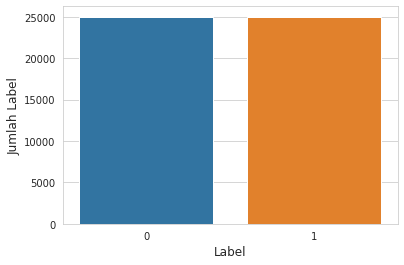

0:Negative, 1:Positive



label
0    25000
1    25000
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

sns.countplot(x='label', data=data)
    
plt.ylabel('Jumlah Label', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()
print("0:Negative, 1:Positive")

print()
#Hitung jumlah label 
count = data.groupby(['label'])['label'].count()
count

In [ ]:
dfUpper = data.iloc[0:6000]
dfLower = data.iloc[44000:50000]
data = pd.concat([dfUpper, dfLower])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  12000 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.2+ KB


## Cleaning

In [ ]:
import string

#remove <br/>
removed_br = []

for review in data['review']:
  removed_br.append(review.replace('<br /><br />', ' '))

data['review'] = removed_br

#removing special characters
def cleaning(s):
    clear_string = ""
    for symbol in s:
        if symbol not in string.punctuation:
            clear_string += symbol
    return clear_string

#removing certain characters
string_punctuation =  "\n"

def remove(s):
    no_punct = ""
    for letter in s:
        if letter not in string_punctuation:
            no_punct += letter
    return no_punct

#make sure everything is clean for the last time
def preprocess(dat):
    #Ubah - menjadi space
    regex = r'\-'
    dat = dat.replace(regex, ' ')
    regex = r'[^a-zA-Z\s]' 

    # Ubah seluruh huruf dalam data artikel ke dalam lower case(casefolding)
    dat = dat.lower()

    # Hapus seluruh simbol yang ada dan ganti dengan string kosong ('')
    dat = dat.replace(regex, '')

    # Hapus enter, ganti dengan space
    regex = r'\n'
    dat = dat.replace(regex, ' ')

    return dat

data['review_clean'] = data['review'].apply(cleaning)
data['review_clean'] = data['review_clean'].apply(remove)
data['review_clean'] = data['review_clean'].apply(preprocess)

#removing numbers
data['review_clean'] = data['review_clean'].str.replace(r'\d+','')

data = data[['review','review_clean','label']]

data.head(1)

,review,review_clean,label
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,1


### Stopword Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def removeStopword(df,stop_words_):
    for stop_word in stop_words_:
        regex_stopword = r"\b" + stop_word + r"\b"
        df = df.str.replace(regex_stopword, '')
    return df

In [ ]:
data['review_stopword'] = removeStopword(data['review_clean'],stop_words)
dataB = data['review_stopword']

In [ ]:
data = data[['label','review','review_clean','review_stopword']]
data.head(1)

,label,review,review_clean,review_stopword
0,1,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings 

### Lemmatization & Stemming

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer() # nltk

In [ ]:
def nltk_tag_to_wordnet_tag(nltk_tag):
  
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [ ]:
def lemmatize_sentence(sentence):
 
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
 
            lemmatized_sentence.append(word)
        else:        
           
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#### Stemming

In [ ]:
def stemming(text, lemmatizer):
    text_split = text.split(" ")
    stemmed_list = []
    for i in text_split:
        stem_text1 = lemmatizer.lemmatize(i, pos="v")
        stem_text2 = lemmatizer.lemmatize(stem_text1, pos="n")
        stem_text3 = lemmatizer.lemmatize(stem_text2, pos="a")
        stemmed_list.append(stem_text3)
    stemmed = ' '.join(map(str,stemmed_list))
    return stemmed

def stemData(data, lemmatizer):
    for i,v in enumerate(data):
      data[i]=lemmatize_sentence(v)
    
    data = data.map(lambda com : stemming(com,lemmatizer))
    return data

In [ ]:
data['review_LST'] = stemData(data['review_stopword'], lemmatizer)
data = data[['label','review','review_clean','review_LST']]
data = pd.concat([data, dataB], axis=1)
data = data[['label','review','review_clean','review_stopword','review_LST']]
data.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,review,review_clean,review_stopword,review_LST
0,1,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,one reviewers mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodg

#### Save data

In [ ]:
data_prep_stem = data[['review_LST','label']]
data_prep_stem = data_prep_stem.rename(columns={'review_LST' : 'review'})

data_prep_stem.to_csv("/content/drive/My Drive/TA/prep/data_prep_stem.csv")

In [ ]:
data_prep_unstem = data[['review_stopword','label']]
data_prep_unstem = data_prep_stem.rename(columns={'review_stopword' : 'review'})

data_prep_unstem.to_csv("/content/drive/My Drive/TA/prep/data_prep_unstem.csv")

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

def splitData(df):
    X_train, X_test, y_train, y_test = train_test_split(df['review'], df[['label']], test_size = 0.5, random_state= 42, shuffle = True)

    df_train = y_train.copy() 
    df_train = df_train.join(X_train)

    df_test = y_test.copy() 
    df_test = df_test.join(X_test)

    return df_train, df_test

data_train_stem, data_test_stem = splitData(data_prep_stem)
data_train_unstem, data_test_unstem= splitData(data_prep_unstem)

In [ ]:
print("#STEM")
print("Data Train")
print('Jumlah Data :', len(data_train_stem))
print('Label : ', data_train_stem.groupby(['label'])['label'].count())
print()
print("Data Test")
print('Jumlah Data :', len(data_test_stem))
print('Label : ', data_test_stem.groupby(['label'])['label'].count())

print()
print()

print("#UNSTEM")
print("Data Train")
print('Jumlah Data :', len(data_train_unstem))
print('Label : ', data_train_unstem.groupby(['label'])['label'].count())
print()
print("Data Test")
print('Jumlah Data :', len(data_test_unstem))
print('Label : ', data_test_unstem.groupby(['label'])['label'].count())

#STEM
Data Train
Jumlah Data : 6000
Label :  label
0    3010
1    2990
Name: label, dtype: int64

Data Test
Jumlah Data : 6000
Label :  label
0    3049
1    2951
Name: label, dtype: int64


#UNSTEM
Data Train
Jumlah Data : 6000
Label :  label
0    3010
1    2990
Name: label, dtype: int64

Data Test
Jumlah Data : 6000
Label :  label
0    3049
1    2951
Name: label, dtype: int64


In [ ]:
data_train_stem.to_csv("data_train_stem.csv")
data_test_stem.to_csv("data_test_stem.csv")

data_train_unstem.to_csv("data_train_unstem.csv")
data_test_unstem.to_csv("data_test_unstem.csv")

In [ ]:
x_train_stem = data_train_stem['review']
x_test_stem = data_test_stem['review']
y_train_stem = data_train_stem.drop(['review'],axis=1)
y_test_stem = data_test_stem.drop(['review'],axis=1)

In [ ]:
x_train_unstem = data_train_unstem['review']
x_test_unstem = data_test_unstem['review']
y_train_unstem = data_train_unstem.drop(['review'],axis=1)
y_test_unstem = data_test_unstem.drop(['review'],axis=1)

# Feature Extraction

## Word2Vec

In [ ]:
!pip install gensim

import re

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import warnings
warnings.filterwarnings("ignore")

### Dimension = 100

#### Skipgram

In [ ]:
modelword2vec_100 = KeyedVectors.load_word2vec_format("/content/drive/My Drive/TA/ws_model100.txt")

#### Tokenization

In [ ]:
class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

#### Mean Embedding Vectorizer

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # bila kata kosong akan return vecktor 0 dengan dimensi yang sama untuk semua vektor lainnya
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    def cek(self,xx):
      return self.word2vec.wv[xx]
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [ ]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(modelword2vec_100)

#### Implementation

In [ ]:
def word2vec (X_train_,X_test_,y_train_,y_test_):
    features_train = mean_embedding_vectorizer.fit_transform(X_train_)
    labels_train = y_train_.values
    features_test = mean_embedding_vectorizer.transform(X_test_)
    labels_test = y_test_.values
    data_train_w2v = pd.DataFrame(data=features_train)
    data_train_w2v = data_train_w2v.join(pd.DataFrame(data=labels_train,columns=['label']))
    data_test_w2v = pd.DataFrame(data=features_test)
    data_test_w2v = data_test_w2v.join(pd.DataFrame(data=labels_test,columns=['label']))
    return data_train_w2v, data_test_w2v

In [ ]:
#Stemmed
data_train_stem_w2v, data_test_stem_w2v = word2vec(x_train_stem, x_test_stem, y_train_stem,y_test_stem)

#Un-Stemmed
data_train_unstem_w2v, data_test_unstem_w2v = word2vec(x_train_unstem, x_test_unstem, y_train_unstem,y_test_unstem)

#### Save Data

In [ ]:
#Stemmed
data_train_stem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_train_stem_w2v_100.csv")
data_test_stem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_test_stem_w2v_100.csv")

#Un-Stemmed
data_train_unstem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_train_unstem_w2v_100.csv")
data_test_unstem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_test_unstem_w2v_100.csv")

### Dimension = 300

#### Skipgram

In [ ]:
modelword2vec_300 = KeyedVectors.load_word2vec_format("/content/drive/My Drive/TA/ws_model300.txt")

#### Tokenization

In [ ]:
class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

#### Mean Embedding Vectorizer

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # bila kata kosong akan return vecktor 0 dengan dimensi yang sama untuk semua vektor lainnya
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    def cek(self,xx):
      return self.word2vec.wv[xx]
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [ ]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(modelword2vec_300)

#### Implementation

In [ ]:
def word2vec (X_train_,X_test_,y_train_,y_test_):
    features_train = mean_embedding_vectorizer.fit_transform(X_train_)
    labels_train = y_train_.values
    features_test = mean_embedding_vectorizer.transform(X_test_)
    labels_test = y_test_.values
    data_train_w2v = pd.DataFrame(data=features_train)
    data_train_w2v = data_train_w2v.join(pd.DataFrame(data=labels_train,columns=['label']))
    data_test_w2v = pd.DataFrame(data=features_test)
    data_test_w2v = data_test_w2v.join(pd.DataFrame(data=labels_test,columns=['label']))
    return data_train_w2v, data_test_w2v

In [ ]:
#Stemmed
data_train_stem_w2v, data_test_stem_w2v = word2vec(x_train_stem, x_test_stem, y_train_stem,y_test_stem)

#Un-Stemmed
data_train_unstem_w2v, data_test_unstem_w2v = word2vec(x_train_unstem, x_test_unstem, y_train_unstem,y_test_unstem)

#### Save Data

In [ ]:
#Stemmed
data_train_stem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_train_stem_w2v_300.csv")
data_test_stem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_test_stem_w2v_300.csv")

#Un-Stemmed
data_train_unstem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_train_unstem_w2v_300.csv")
data_test_unstem_w2v.to_csv("/content/drive/My Drive/TA/w2v/data_test_unstem_w2v_300.csv")

# Classification

In [ ]:
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss

## Dimension = 100

In [ ]:
data_train_stem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_train_stem_w2v_100.csv",index_col=0)
data_test_stem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_test_stem_w2v_100.csv",index_col=0)

data_train_unstem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_train_unstem_w2v_100.csv",index_col=0)
data_test_unstem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_test_unstem_w2v_100.csv",index_col=0)

In [ ]:
x_train_stem = data_train_stem_w2v.drop(['label'],axis=1)
x_test_stem = data_test_stem_w2v.drop(['label'],axis=1)
y_train_stem = data_train_stem_w2v[['label']]
y_test_stem = data_test_stem_w2v[['label']]

In [ ]:
x_train_unstem = data_train_unstem_w2v.drop(['label'],axis=1)
x_test_unstem = data_test_unstem_w2v.drop(['label'],axis=1)
y_train_unstem = data_train_unstem_w2v[['label']]
y_test_unstem = data_test_unstem_w2v[['label']]

#### Stemmed

##### Random Forest Classifier (Base Model)

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
rfc.fit(x_train_stem, y_train_stem)
pred_stem = rfc.predict(x_test_stem)

print("Training acc:", rfc.score(x_train_stem, y_train_stem), 
      "\nTesting acc:", rfc.score(x_test_stem, y_test_stem))

Training acc: 1.0 
Testing acc: 0.7096666666666667


##### Changing Parameters

In [ ]:
parameters = {"min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10], 
              "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20], 
              }
gridsearch2 = GridSearchCV(rfc, parameters) 
gridsearch2.fit(x_train_stem, y_train_stem)

gridsearch2.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [ ]:
reg_forest = gridsearch2.best_estimator_
reg_forest.fit(x_train_stem, y_train_stem)
pred_stem2 = reg_forest.predict(x_test_stem)
print("Training acc:", reg_forest.score(x_train_stem, y_train_stem), "\nTesting acc:",
      reg_forest.score(x_test_stem, y_test_stem))

Training acc: 0.9441666666666667 
Testing acc: 0.7098333333333333


##### Improving Random Forest model accuracy using Adaptive Boost

In [ ]:
boost_reg2 = AdaBoostClassifier(base_estimator=reg_forest)
boost_reg2.fit(x_train_stem, y_train_stem)
pred_stem3 = boost_reg2.predict(x_test_stem)
print("Training acc:", boost_reg2.score(x_train_stem, y_train_stem), "\nTesting acc:",
      boost_reg2.score(x_test_stem, y_test_stem))

Training acc: 1.0 
Testing acc: 0.7271666666666666


##### Evaluation

###### Base Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem))
print(classification_report(y_test_stem['label'], pred_stem))

[[2203  846]
 [ 896 2055]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3049
           1       0.71      0.70      0.70      2951

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



###### Changed Parameters

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem2))
print(classification_report(y_test_stem['label'], pred_stem2))

[[2185  864]
 [ 877 2074]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3049
           1       0.71      0.70      0.70      2951

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



###### Boosted Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem3))
print(classification_report(y_test_stem['label'], pred_stem3))

[[2230  819]
 [ 818 2133]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3049
           1       0.72      0.72      0.72      2951

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



#### Un-Stemmed

##### Random Forest Classifier (Base Model)

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
rfc.fit(x_train_unstem, y_train_unstem)
pred_unstem = rfc.predict(x_test_unstem)

print("Training acc:", rfc.score(x_train_unstem, y_train_unstem), 
      "\nTesting acc:", rfc.score(x_test_unstem, y_test_unstem))

Training acc: 1.0 
Testing acc: 0.7086666666666667


##### Changing Parameters

In [ ]:
parameters = {"min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10], 
              "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20], 
              }
gridsearch2 = GridSearchCV(rfc, parameters) 
gridsearch2.fit(x_train_unstem, y_train_unstem)

gridsearch2.best_params_

{'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
reg_forest = gridsearch2.best_estimator_
reg_forest.fit(x_train_unstem, y_train_unstem)
pred_unstem2 = reg_forest.predict(x_test_unstem)
print("Training acc:", reg_forest.score(x_train_unstem, y_train_unstem), "\nTesting acc:",
      reg_forest.score(x_test_unstem, y_test_unstem))

Training acc: 0.9586666666666667 
Testing acc: 0.7103333333333334


##### Improving Random Forest model accuracy using Adaptive Boost

In [ ]:
boost_reg2 = AdaBoostClassifier(base_estimator=reg_forest)
boost_reg2.fit(x_train_unstem, y_train_unstem)
pred_unstem3 = boost_reg2.predict(x_test_unstem)
print("Training acc:", boost_reg2.score(x_train_unstem, y_train_unstem), "\nTesting acc:",
      boost_reg2.score(x_test_unstem, y_test_unstem))

Training acc: 0.9991666666666666 
Testing acc: 0.729


##### Evaluation

###### Base Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_unstem))
print(classification_report(y_test_stem['label'], pred_unstem))

[[2186  863]
 [ 885 2066]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      3049
           1       0.71      0.70      0.70      2951

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



###### Changed Parameters

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_unstem2))
print(classification_report(y_test_stem['label'], pred_unstem2))

[[2210  839]
 [ 899 2052]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3049
           1       0.71      0.70      0.70      2951

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



###### Boosted Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_unstem3))
print(classification_report(y_test_stem['label'], pred_unstem3))

[[2228  821]
 [ 805 2146]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3049
           1       0.72      0.73      0.73      2951

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



## Dimension = 300

In [ ]:
data_train_stem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_train_stem_w2v_300.csv",index_col=0)
data_test_stem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_test_stem_w2v_300.csv",index_col=0)

data_train_unstem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_train_unstem_w2v_300.csv",index_col=0)
data_test_unstem_w2v = pd.read_csv("/content/drive/MyDrive/TA/w2v/data_test_unstem_w2v_300.csv",index_col=0)

In [ ]:
x_train_stem = data_train_stem_w2v.drop(['label'],axis=1)
x_test_stem = data_test_stem_w2v.drop(['label'],axis=1)
y_train_stem = data_train_stem_w2v[['label']]
y_test_stem = data_test_stem_w2v[['label']]

In [ ]:
x_train_unstem = data_train_unstem_w2v.drop(['label'],axis=1)
x_test_unstem = data_test_unstem_w2v.drop(['label'],axis=1)
y_train_unstem = data_train_unstem_w2v[['label']]
y_test_unstem = data_test_unstem_w2v[['label']]

#### Stemmed

##### Random Forest Classifier (Base Model)

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
rfc.fit(x_train_stem, y_train_stem)
pred_stem = rfc.predict(x_test_stem)
print("Training acc:", rfc.score(x_train_stem, y_train_stem), "\nTesting acc:",
      rfc.score(x_test_stem, y_test_stem))

Training acc: 1.0 
Testing acc: 0.7218333333333333


##### Changing Parameters

In [ ]:
parameters = {"min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10], 
              "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20], 
              }
gridsearch2 = GridSearchCV(rfc, parameters) 
gridsearch2.fit(x_train_stem, y_train_stem)

gridsearch2.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [ ]:
reg_forest = gridsearch2.best_estimator_
reg_forest.fit(x_train_stem, y_train_stem)
pred_stem2 = reg_forest.predict(x_test_stem)
print("Training acc:", reg_forest.score(x_train_stem, y_train_stem), "\nTesting acc:",
      reg_forest.score(x_test_stem, y_test_stem))

Training acc: 0.9693333333333334 
Testing acc: 0.729


##### Improving Random Forest model accuracy using Adaptive Boost

In [ ]:
boost_reg2 = AdaBoostClassifier(base_estimator=reg_forest)
boost_reg2.fit(x_train_stem, y_train_stem)
pred_stem3 = boost_reg2.predict(x_test_stem)
print("Training acc:", boost_reg2.score(x_train_stem, y_train_stem), "\nTesting acc:",
      boost_reg2.score(x_test_stem, y_test_stem))

Training acc: 1.0 
Testing acc: 0.7463333333333333


##### Evaluation

###### Base Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem))
print(classification_report(y_test_stem['label'], pred_stem))

[[2256  793]
 [ 876 2075]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3049
           1       0.72      0.70      0.71      2951

    accuracy                           0.72      6000
   macro avg       0.72      0.72      0.72      6000
weighted avg       0.72      0.72      0.72      6000



###### Changed Parameters

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem2))
print(classification_report(y_test_stem['label'], pred_stem2))

[[2257  792]
 [ 834 2117]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3049
           1       0.73      0.72      0.72      2951

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



###### Boosted Model

In [ ]:
print(confusion_matrix(y_test_stem['label'], pred_stem3))
print(classification_report(y_test_stem['label'], pred_stem3))

[[2276  773]
 [ 749 2202]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3049
           1       0.74      0.75      0.74      2951

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



#### Un-Stemmed

##### Random Forest Classifier (Base Model)

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
rfc.fit(x_train_unstem, y_train_unstem)
pred_unstem = rfc.predict(x_test_unstem)

print("Training acc:", rfc.score(x_train_unstem, y_train_unstem), 
      "\nTesting acc:", rfc.score(x_test_unstem, y_test_unstem))

Training acc: 1.0 
Testing acc: 0.7226666666666667


##### Changing Parameters

In [ ]:
parameters = {"min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10], 
              "min_samples_leaf": [1, 5, 10], 
              "max_leaf_nodes": [None, 5, 10, 20], 
              }
gridsearch2 = GridSearchCV(rfc, parameters) 
gridsearch2.fit(x_train_unstem, y_train_unstem)

gridsearch2.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [ ]:
reg_forest = gridsearch2.best_estimator_
reg_forest.fit(x_train_unstem, y_train_unstem)
pred_unstem2 = reg_forest.predict(x_test_unstem)
print("Training acc:", reg_forest.score(x_train_unstem, y_train_unstem), "\nTesting acc:",
      reg_forest.score(x_test_unstem, y_test_unstem))

Training acc: 0.9991666666666666 
Testing acc: 0.7251666666666666


##### Improving Random Forest model accuracy using Adaptive Boost

In [ ]:
boost_reg2 = AdaBoostClassifier(base_estimator=reg_forest)
boost_reg2.fit(x_train_unstem, y_train_unstem)
pred_unstem2 = boost_reg2.predict(x_test_unstem)
print("Training acc:", boost_reg2.score(x_train_unstem, y_train_unstem), "\nTesting acc:",
      boost_reg2.score(x_test_unstem, y_test_unstem))

Training acc: 1.0 
Testing acc: 0.7348333333333333


##### Evaluation

###### Base Model

In [ ]:
print(confusion_matrix(y_test_unstem['label'], pred_unstem))
print(classification_report(y_test_unstem['label'], pred_unstem))

[[2240  809]
 [ 855 2096]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      3049
           1       0.72      0.71      0.72      2951

    accuracy                           0.72      6000
   macro avg       0.72      0.72      0.72      6000
weighted avg       0.72      0.72      0.72      6000



###### Changed Parameters

In [ ]:
print(confusion_matrix(y_test_unstem['label'], pred_unstem2))
print(classification_report(y_test_unstem['label'], pred_unstem2))

[[2253  796]
 [ 795 2156]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3049
           1       0.73      0.73      0.73      2951

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



###### Boosted Model

In [ ]:
print(confusion_matrix(y_test_unstem['label'], pred_unstem3))
print(classification_report(y_test_unstem['label'], pred_unstem3))

[[2228  821]
 [ 805 2146]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3049
           1       0.72      0.73      0.73      2951

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000

